In [70]:
import numpy as np
import skimage.io as io
import skfuzzy as fuzz
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

In [90]:
# Step 1: Vanishing line detection
def detect_vanishing_line(Ir_image):
    # Perform vanishing line detection using the normal distribution
    # Return the vanishing line coordinates
    gray=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    edges=cv.Canny(gray,50,150,apertureSize=3)
    lines = cv.HoughLines(edges, 1, np.pi/180, 200)
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img1,(x1,y1),(x2,y2),(0,0,255),1)
    vanishing_line = Ir_image

    return vanishing_line

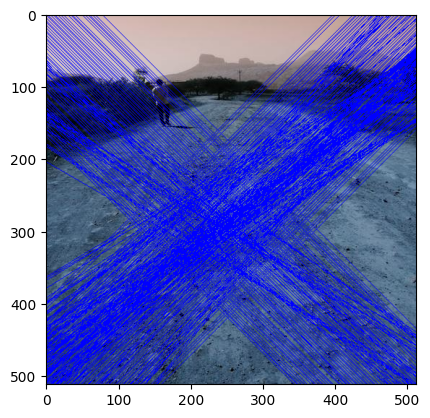

In [91]:
img1 = cv.imread('Image13.jpg')
vanishing_img=detect_vanishing_line(img1)
plt.imshow(vanishing_img)

In [92]:
def segment_image(image):
    # Perform image segmentation using the double-Otsu algorithm
    # Return the segmented image
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Apply median filter for Smoothing the image  
    gray = cv.medianBlur(gray, 5)
    # Apply double-Otsu thresholding to segment the image
    _, segmented_image = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    return segmented_image

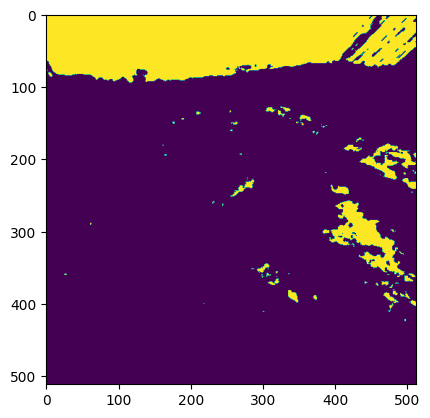

In [93]:
# Step 2: Image segmentation
segmented_image = segment_image(vanishing_img)

# Display the segmented image
plt.imshow(segmented_image)

In [94]:
# Remove small clusters
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(segmented_image,cv.MORPH_OPEN,kernel, iterations = 3) #First perfom Erosion then Dilation

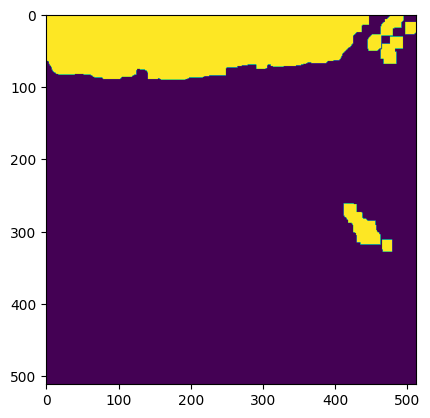

In [95]:
plt.imshow(opening)

In [96]:
# Fill in gaps
kernel = np.ones((8,8),np.uint8)
closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 1) #First perfom Dilation then Erosion

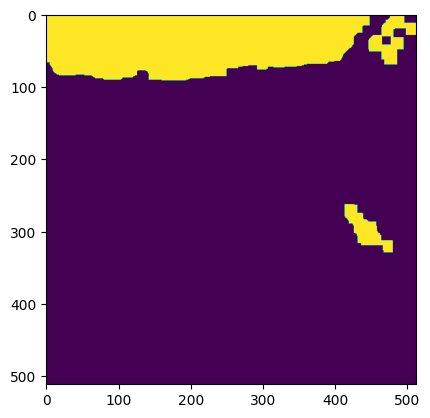

In [97]:
plt.imshow(closing)

In [114]:
# Load the image
image = cv.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
image_gray = io.imread('Image12.jpg', as_gray=True)

#image_gray = closing

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)

# Print shape information for debugging
print('Image shape:', image.shape)
print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)


# Set the number of clusters (desired segments)
num_clusters =5

# Set the fuzziness parameter
m = 2.0

# Apply Possibilistic C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data.T, num_clusters, m, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Calculate combined map
combined_map = np.max(u, axis=0)

# Reshape the combined map to match the shape of the original image
combined_map = combined_map.reshape(image_gray.shape)

Image shape: (512, 512, 3)
Grayscale image shape: (512, 512)
Image data shape: (262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 

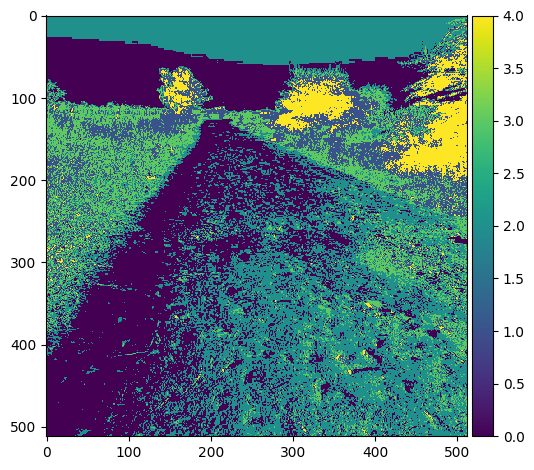

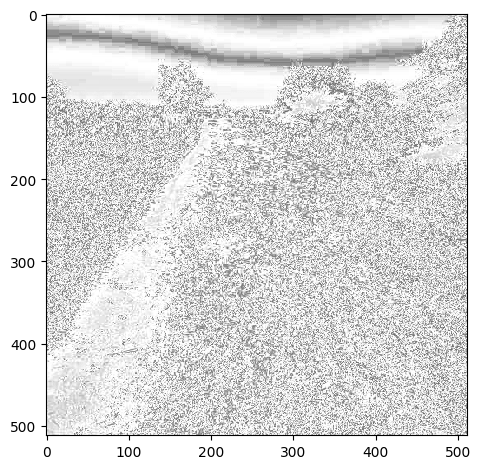

In [115]:
# Display the segmented image
io.imshow(segmented_image)
io.show()

# Display the combined map
io.imshow(combined_map)
io.show()

In [108]:
# Load the image
image = cv.imread('image13.jpg')

# Preprocessing: Convert the image to grayscale
image_gray = io.imread('image13.jpg', as_gray=True)



#image_gray = closing

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)

# Print shape information 
print('Image shape:', image.shape)
print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)


# Set the number of clusters
num_clusters = 5

# Set the fuzziness parameter
m = 2.0

# Apply Possibilistic C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data.T, num_clusters, m, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Calculate combined map
combined_map = np.max(u, axis=0)

# Reshape the combined map to match the shape of the original image
combined_map = combined_map.reshape(image_gray.shape)



Image shape: (512, 512, 3)
Grayscale image shape: (512, 512)
Image data shape: (262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 

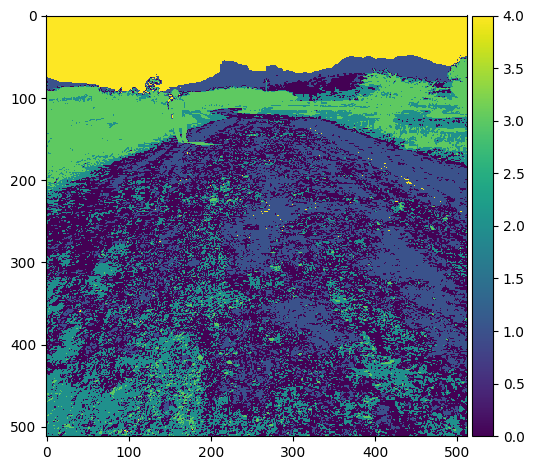

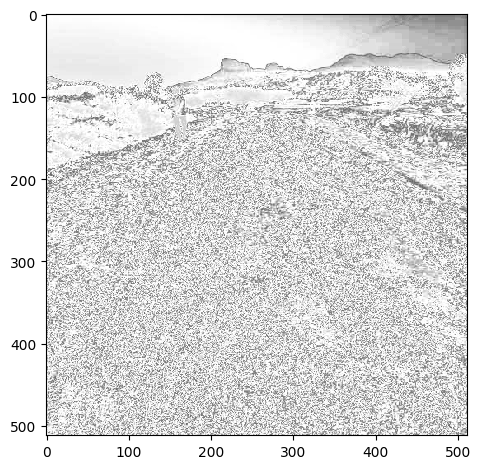

In [109]:
# Display the segmented image
io.imshow(segmented_image)
io.show()

# Display the combined map
io.imshow(combined_map)
io.show()

In [ ]:
# Calculate the trapezoid prediction
#trapezoid_prediction = fuzz.defuzz(image_data.T, u, mode='centroid')

# Reshape the trapezoid prediction to match the shape of the original image
#trapezoid_prediction = trapezoid_prediction.reshape(image_gray.shape)

# Calculate the probability map
#probability_map = fuzz.probability(image_data.T, u, cluster_centers)

# Reshape the probability map to match the shape of the original image
#probability_map = probability_map.reshape(image_gray.shape)

In [ ]:
# Display the trapezoid prediction
#io.imshow(trapezoid_prediction)
#io.show()

# Display the probability map
#io.imshow(probability_map)
#io.show()

In [ ]:


# Load the image
#image = io.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
#image_gray = io.imread('Image12.jpg', as_gray=True)

# Reshape the grayscale image to a 1D array
#image_data = image_gray.reshape(-1)
image_data = closing.reshape(-1)

# Set the number of clusters (desired segments)
num_clusters = 4

# Apply Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data, num_clusters, 2, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Display the segmented image
io.imshow(segmented_image)
io.show()


In [ ]:
import numpy as np
import skimage.io as io
import skfuzzy as fuzz

# Load the image
image = io.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
image_gray = io.imread('Image12.jpg', as_gray=True)

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)


# Print shape information for debugging
print('Image shape:', image.shape)
print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)

# Set the number of clusters (desired segments)
num_clusters = 4

# Apply Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data, num_clusters, 2, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Display the segmented image
io.imshow(segmented_image)
io.show()


In [ ]:
import numpy as np
import skimage.io as io
import skfuzzy as fuzz

# Load the image
#image = io.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
#image_gray = io.imread('Image12.jpg', as_gray=True)

# Ensure single-dimensional entries are removed
#image_gray = np.squeeze(image_gray)

# Print shape information for debugging
#print('Image shape:', image.shape)
#print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
#image_data = np.reshape(image_gray, (-1, 1))
image_data=closing
# Print shape information for debugging
#print('Image data shape:', image_data.shape)

# Set the number of clusters (desired segments)
num_clusters = 2

# Apply Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data, num_clusters, 2, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape if the size is compatible
if membership_degrees.size == np.prod(image_gray.shape):
    segmented_image = membership_degrees.reshape(image_gray.shape)
else:
    segmented_image = np.resize(membership_degrees, image_gray.shape)



In [ ]:
# Display the segmented image
io.imshow(segmented_image)
io.show()


In [ ]:
import numpy as np
import skimage.io as io
import skimage.exposure as exposure
import skfuzzy as fuzz

# Load the image
image = io.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale and apply contrast stretching
image_gray = exposure.rescale_intensity(io.imread('Image12.jpg', as_gray=True))

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)

# Print shape information for debugging
print('Image shape:', image.shape)
print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)

# Set the number of clusters (desired segments)
num_clusters = 4

# Set the fuzziness parameter
m = 2.0

# Apply Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data, num_clusters, m, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape if the size is compatible
if membership_degrees.size == np.prod(image_gray.shape):
    segmented_image = membership_degrees.reshape(image_gray.shape)
else:
    segmented_image = np.resize(membership_degrees, image_gray.shape)

# Display the segmented image
io.imshow(segmented_image)
io.show()
